# Impact of noise

In [1]:
path1 = "./modelbruiter"
path2 = "./modelbruiter"

## import data

In [2]:
import matplotlib.pyplot as plt
import time
import dataset
nb_point = 1000
dataset1, true_labels1 = dataset.two_moon(nb_point)
dataset2, true_labels2 = dataset.two_gauss_moon(nb_point)
dataset3, true_labels3 = dataset.two_gauss(nb_point)
data = [dataset1, dataset2, dataset3]
true_labels = [true_labels1, true_labels2, true_labels3]
nb_dataset = len(data)

path_data = ["/dataset1", "/dataset2", "/dataset3"]

# import noisy model

In [3]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_aer import AerSimulator
from qiskit.primitives import BackendSamplerV2 as BackendSampler
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit.providers import Options
service = QiskitRuntimeService(
    channel='ibm_quantum',
    instance='ibm-q/open/main',
    token='my_token'
    )
backend = service.backend('ibm_brisbane')
device_backend = AerSimulator.from_backend(backend)
#options = Options(shots=1000)
options = {"default_shots":100}
sampler = BackendSampler(backend=device_backend, options=options)
#sampler = Sampler(device_backend, options=options)

## clustering

In [4]:
from function_clustering import clustering
save = 1

In [5]:
labels = []
name_methode1 = []
tot_time = []

## Continuous QCBM

In [6]:
from generator.Continuous_QCBM import Continuous_QCBM
model1 = Continuous_QCBM(sampler)
path1 += "/QCBMContinuousNoisy"

In [7]:
# Continuous QCBM
epoch_init = 30
taille_batch_init = 1
learning_rate_init = 1e-2
epoch_EM = 50
taille_batch_EM = 50
learning_rate_EM = 5e-3

In [ ]:
name_methode1.append("Noisy Continuous QCBM\nMixture")
model = model1
i=0
label = []
start = time.time()
for X in data:
    label1 = clustering(X, 2, model, epoch_init, taille_batch_init, learning_rate_init, epoch_EM, taille_batch_EM, learning_rate_EM, VAL=[], PRINT=0, SAVE=save, PATH=path1+path_data[i])
    label.append(label1)
    i+=1
labels.append(label)
stop = time.time()
tot_time.append(stop-start)

In [12]:
i=0
for X in data:
    print("dataset ",i)
    dataset.display_metrics(X, label[i], true_labels[i])
    print("")
    i=i+1

dataset  0
Silhouette Score: 0.31
Davies-Bouldin Index: 1.05
Calinski-Harabasz Index: 504.07
Adjusted Rand Index: 0.1529773
Normalized Mutual Information (NMI): 0.1586217

dataset  1
Silhouette Score: 0.43
Davies-Bouldin Index: 1.10
Calinski-Harabasz Index: 587.96
Adjusted Rand Index: 0.9642883
Normalized Mutual Information (NMI): 0.9348461

dataset  2
Silhouette Score: 0.42
Davies-Bouldin Index: 1.65
Calinski-Harabasz Index: 305.76
Adjusted Rand Index: 0.5391528
Normalized Mutual Information (NMI): 0.4999662



## Discete QCBM

In [13]:
from generator.Discrete_QCBM import Discrete_QCBM
model2 = Discrete_QCBM(16,2*(0,1), sampler)
path2 += "/QCBMDiscreteNoisy"

In [14]:
epoch_init = 500
taille_batch_init = 500
learning_rate_init = 5e-3
epoch_EM = 500
taille_batch_EM = 500
learning_rate_EM = 5e-3

In [15]:
name_methode1.append("Noisy Discrete QCBM\nMixture")
model = model2
i=0
label = []
start = time.time()
for X in data:
    label2 = clustering(X, 2, model, epoch_init, taille_batch_init, learning_rate_init, epoch_EM, taille_batch_EM, learning_rate_EM, VAL=[], PRINT=0, SAVE=save, PATH=path2+path_data[i])
    label.append(label2)
    i+=1
labels.append(label)
stop = time.time()
tot_time.append(stop-start)

In [16]:
i=0
for X in data:
    print("dataset ",i)
    dataset.display_metrics(X, label[i], true_labels[i])
    print("")
    i=i+1

dataset  0
Silhouette Score: 0.48
Davies-Bouldin Index: 0.82
Calinski-Harabasz Index: 1308.46
Adjusted Rand Index: 0.6492892
Normalized Mutual Information (NMI): 0.5606001

dataset  1
Silhouette Score: 0.44
Davies-Bouldin Index: 0.88
Calinski-Harabasz Index: 654.08
Adjusted Rand Index: 0.2975578
Normalized Mutual Information (NMI): 0.3779452

dataset  2
Silhouette Score: 0.63
Davies-Bouldin Index: 0.46
Calinski-Harabasz Index: 1793.93
Adjusted Rand Index: 0.9772381
Normalized Mutual Information (NMI): 0.9465428



## Result

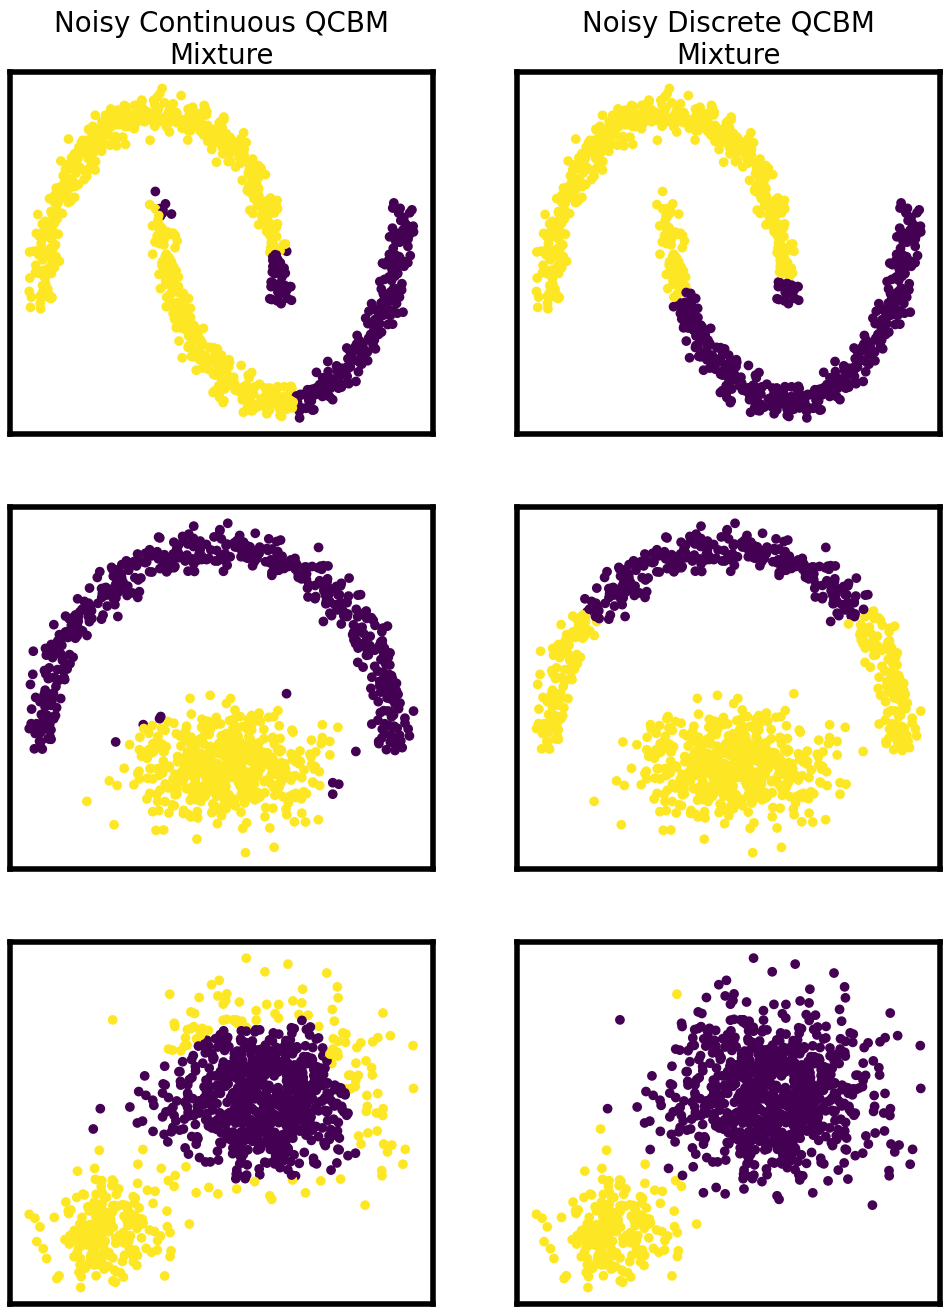

In [17]:
f, axis = plt.subplots(3, 2, figsize=(12, 16)) 
for j in range(2):
    axis[0,j].set_title(name_methode1[j], fontsize=20)
    for i in range(3):
        axis[i,j].scatter(data[i][:,0],data[i][:,1], c=labels[j][i])
        axis[i,j].set_xticks([])
        axis[i,j].set_yticks([])
        for axis_ in ['top','bottom','left','right']:
            axis[i,j].spines[axis_].set_linewidth(4)

#for axis_ in ['top','bottom','left','right']:
#            axis[1,1].spines[axis_].set_linewidth(12)
#f.suptitle(" ", fontsize=20)
f.savefig('./img/resClusteringNoisy.png')
plt.show()

In [18]:
print("time")
for i in range(2):
    print(name_methode1[i], " : ", tot_time[i]/2, "s")

time
Noisy Continuous QCBM
Mixture  :  15707.84928381443 s
Noisy Discrete QCBM
Mixture  :  4969.681104660034 s


## generation

In [19]:
import torch
import function_train
nb_point_gen = 800
data_tot = []
labels2 = []
name_methode2 = []
model_ = [model1, model2]

In [20]:
name_methode2.append("Noisy Continuous QCBM\nMixture")
model = model1
data_gen = []
label = []

i=0
for X in data:
    models = function_train.mixture_generator(2, model, 2)
    path = path1 + path_data[i]
    models.load(path)
    res, l = function_train.point(models, X, nb_point*[0], nb_point_gen, 2)
    data_gen.append(res)
    label.append(l)
    i+=1
data_tot.append(data_gen)
labels2.append(label)

In [21]:
name_methode2.append("Noisy Discrete QCBM\nMixture")
model = model2
data_gen = []
label = []

i=0
for X in data:
    models = function_train.mixture_generator(2, model, 2)
    path = path2 + path_data[i]
    models.load(path)
    res, l = function_train.point(models, X, nb_point*[0], nb_point_gen, 2)
    data_gen.append(res)
    label.append(l)
    i+=1
data_tot.append(data_gen)
labels2.append(label)

3 2


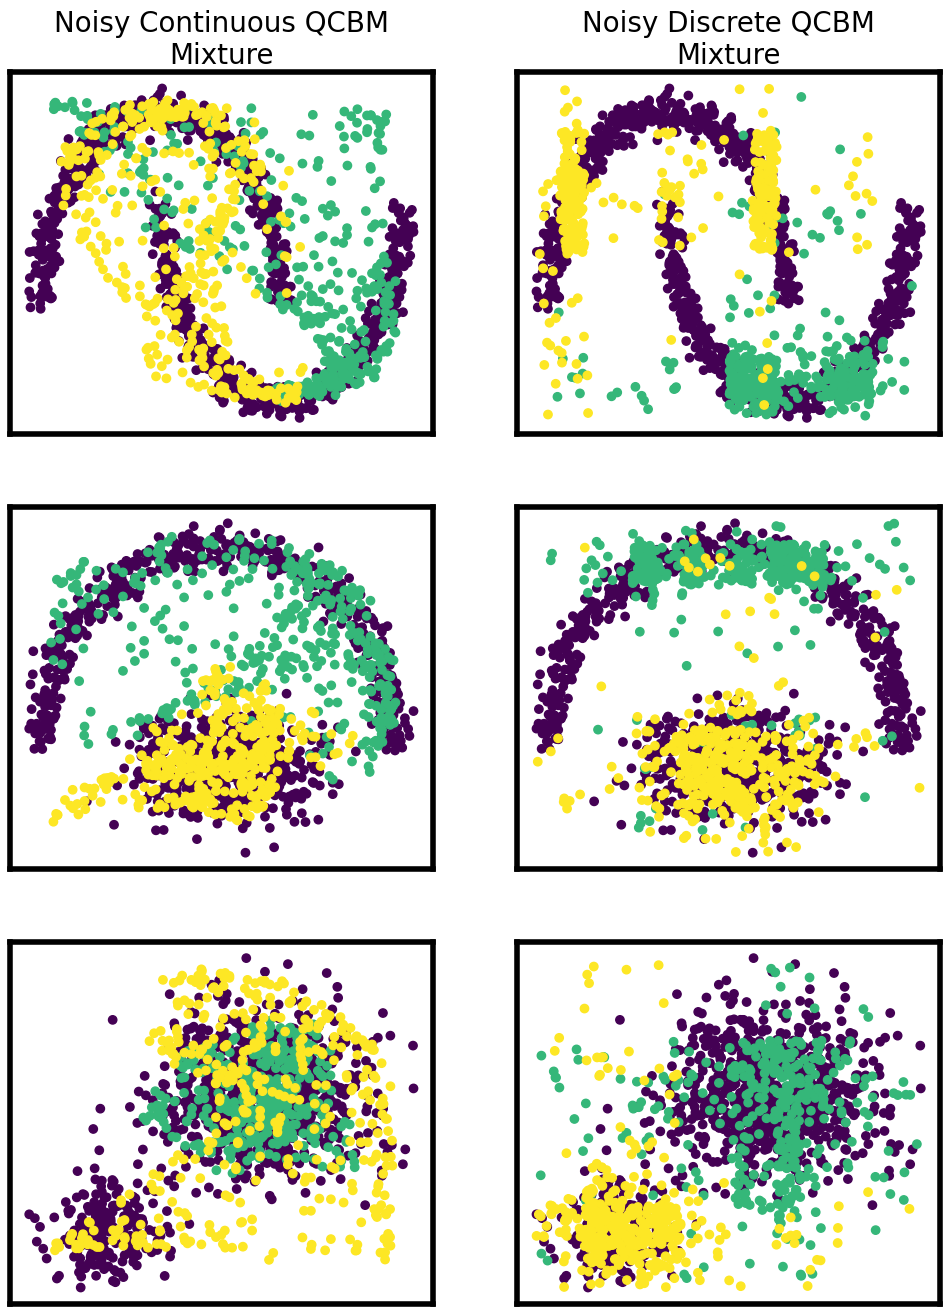

In [22]:
n = len(data)
m = 2
print(n, m)
f, axis = plt.subplots(n, m, figsize=(12, 16)) 
for j in range(m):
    axis[0,j].set_title(name_methode2[j], fontsize=20)
    for i in range(n):
        axis[i,j].scatter(data_tot[j][i][:,0],data_tot[j][i][:,1], c=labels2[j][i])
        axis[i,j].set_xticks([])
        axis[i,j].set_yticks([])
        for axis_ in ['top','bottom','left','right']:
            axis[i,j].spines[axis_].set_linewidth(4)

#f.suptitle(" ", fontsize=20)
f.savefig('./img/resNoisyGenerative.png')
plt.show()